<a href="https://colab.research.google.com/github/syilmazs/DeepLearning/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

## Indest Data

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isna().any().sum()

0

In [9]:
df.shape

(10000, 14)

In [10]:
df.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [12]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1)

In [13]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3512,806,Spain,Male,18,3,0.000,2,1,1,86994.540,0


In [14]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


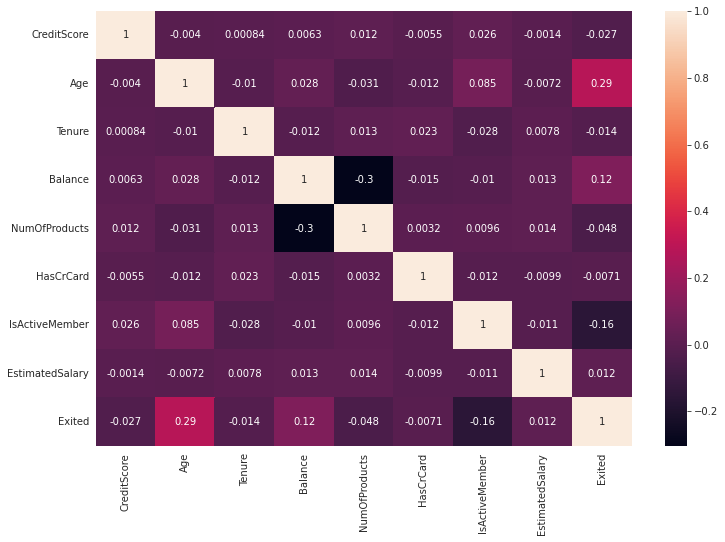

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

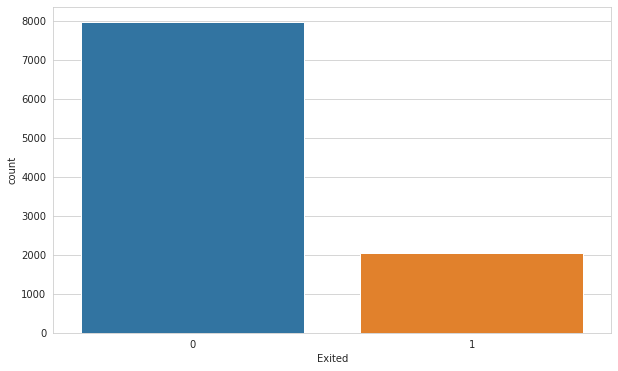

In [16]:
sns.countplot(df.Exited);

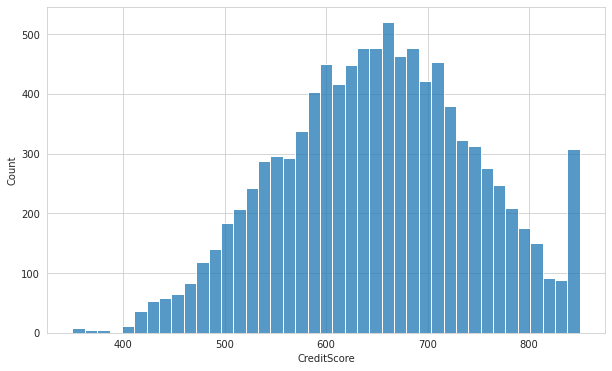

In [17]:
sns.histplot(data=df, x=df.CreditScore)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


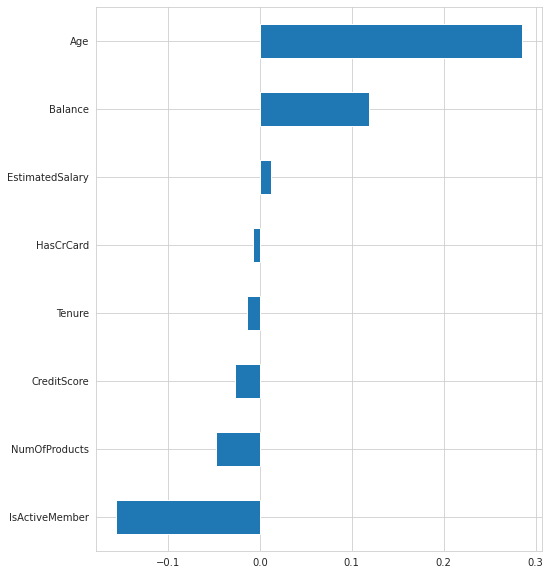

In [19]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [20]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
557,598,Germany,Male,41,3,91536.930,1,1,0,191468.780,1


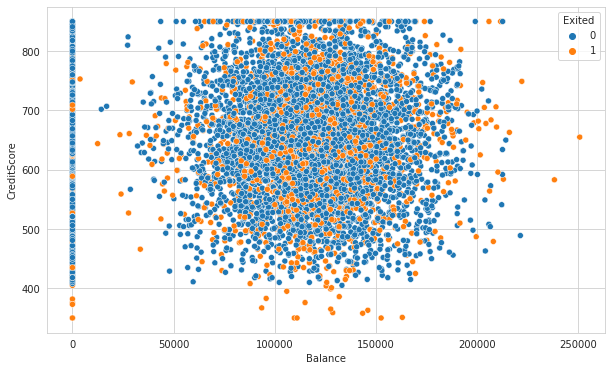

In [21]:
sns.scatterplot(x = 'Balance',y = 'CreditScore', data = df, hue = "Exited");

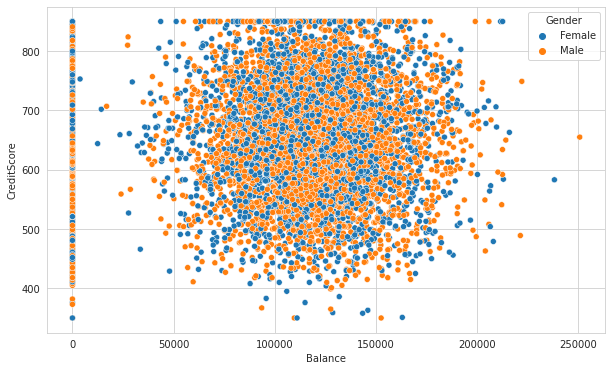

In [22]:
sns.scatterplot(x = 'Balance',y = 'CreditScore', data = df, hue = "Gender");

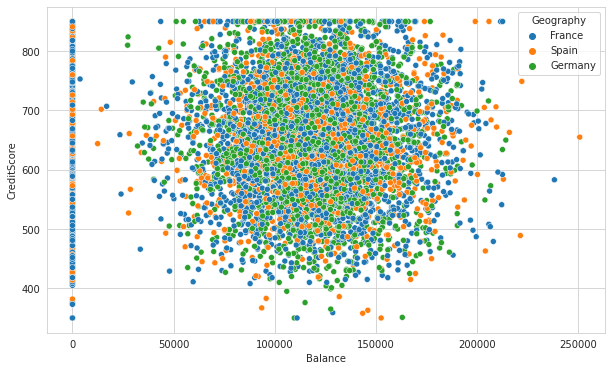

In [23]:
sns.scatterplot(x = 'Balance',y = 'CreditScore', data = df, hue = "Geography");

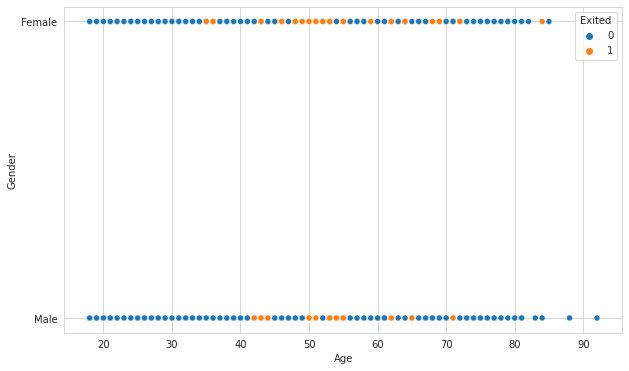

In [24]:
sns.scatterplot(x = 'Age', y = 'Gender', data = df, hue="Exited");

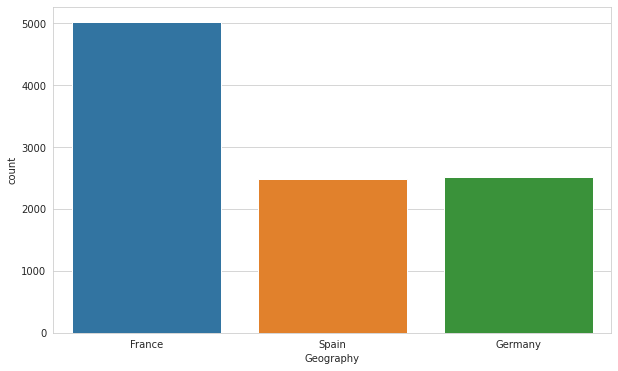

In [25]:
sns.countplot(df.Geography)

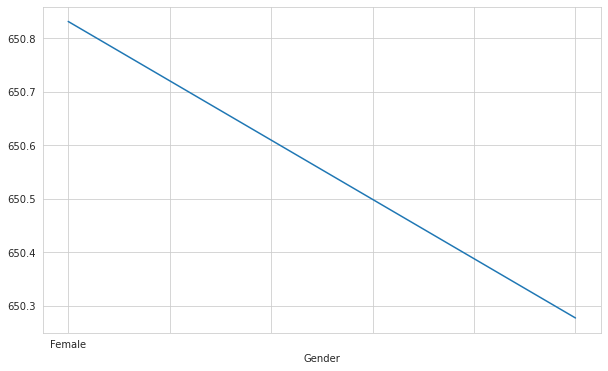

In [26]:
df.groupby('Gender')['CreditScore'].mean().plot();

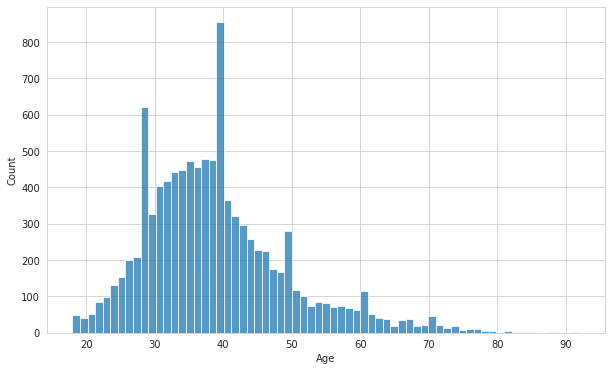

In [27]:
sns.histplot(data=df.Age)

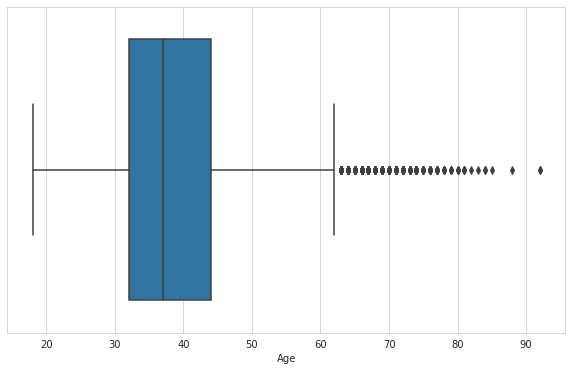

In [28]:
sns.boxplot(df.Age);

In [29]:
iqr = df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [30]:
lower = df.Age.quantile(0.25)-(1.5*iqr)
lower

14.0

In [31]:
upper_tukey = df.Age.quantile(0.75)+(1.5*iqr)
upper_tukey

62.0

In [32]:
upper = df.Age.quantile(0.75)+(2.5*iqr)
upper

74.0

In [33]:
df.Age[df.Age>74].count()

54

In [34]:
drop_index= df.index[df.Age> df.Age.quantile(0.75)+(2.5*iqr)]

In [35]:
drop_index

Int64Index([  85,  252,  310,  371,  766, 1205, 1614, 2164, 2458, 2855, 2925,
            3033, 3142, 3387, 3531, 3602, 3651, 3691, 3826, 3994, 4256, 4273,
            4318, 4501, 4590, 4815, 4832, 4931, 5068, 5490, 5508, 5957, 6167,
            6443, 6530, 6721, 6759, 7063, 7243, 7375, 7526, 7552, 7788, 7956,
            8217, 9080, 9309, 9333, 9490, 9587, 9671, 9736, 9894, 9936],
           dtype='int64')

In [36]:
df.drop(index=drop_index, axis=0, inplace=True)

In [37]:
df.Age.max()

74

In [38]:
df.shape

(9946, 11)

In [39]:
df.reset_index(drop=True)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9941,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9942,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9943,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9944,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [40]:
df = pd.get_dummies(df)

In [41]:
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8042,606,37,6,82373.940,1,0,0,172526.900,1,1,0,0,0,1


## Preprocessing of Data
- Train | Test Split, Scalling

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop("Exited", axis=1)
y = df.Exited

In [44]:
seed = 101

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=seed)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
tf.__version__

'2.8.0'

### Creating Model

### without class_weigth

In [52]:
X_train_scaled.shape

(7956, 13)

In [53]:
X_test_scaled.shape

(1990, 13)

In [54]:
tf.random.set_seed(seed) 

model = Sequential()

model.add(Dense(13, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [55]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [56]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.15, batch_size = 132, epochs = 250, verbose =1, callbacks = [early_stop])

Epoch 1/250
52/52 [==============================] - 1s 6ms/step - loss: 0.6855 - accuracy: 0.7845 - val_loss: 0.6670 - val_accuracy: 0.7948
Epoch 2/250
52/52 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7953 - val_loss: 0.4983 - val_accuracy: 0.7948
Epoch 3/250
52/52 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7953 - val_loss: 0.4866 - val_accuracy: 0.7948
Epoch 4/250
52/52 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7953 - val_loss: 0.4781 - val_accuracy: 0.7948
Epoch 5/250
52/52 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7953 - val_loss: 0.4720 - val_accuracy: 0.7948
Epoch 6/250
52/52 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.7953 - val_loss: 0.4655 - val_accuracy: 0.7948
Epoch 7/250
52/52 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7953 - val_loss: 0.4604 - val_accuracy: 0.7948
Epoch 8/250
5

#### Evaluate

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 7)                 98        
                                                                 
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 13) dtype=float32, numpy=
 array([[-0.09726036, -0.37159634, -0.24922335, -0.12441041,  0.15791117,
          0.130953  ,  0.3206851 ,  0.214945  , -0.0058858 , -0.23958907,
          0.3933573 ,  0.37347138,  0.3746707 ],
        [-0.11513016, -0.4308792 , -0.8080441 ,  0.7047405 , -0.10235359,
         -0.00593918, -1.2770422 , -0.60721   ,  0.0692795 ,  0.34392327,
          0.01034228,  0.37538445, -0.23137899],
        [ 0.25301504,  0.4188502 , -0.2396017 ,  0.13836671,  0.6549066 ,
          0.09340446, -0.03845939,  0.03595641,  0.44073477,  0.39407074,
         -0.38925147, -0.058957  , -0.160883  ],
        [ 0.42026755, -0.4736626 , -0.00525741, -0.28290492,  0.20114255,
          0.17596903,  0.18066888, -0.47509253, -0.16198486,  0.06099426,
         -0.05195853, -0.27778983, -0.03122893],
        [ 0.10214714, -0.18331563, -0.21708746, -0.22149087, -0.00262591,
          0.9996051 , -0.12349409, -0.37899172, -0.539993  , -0.024808

In [59]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.685,0.785,0.667,0.795
1,0.549,0.795,0.498,0.795
2,0.495,0.795,0.487,0.795
3,0.486,0.795,0.478,0.795
4,0.480,0.795,0.472,0.795
...,...,...,...,...
145,0.339,0.860,0.345,0.870
146,0.338,0.860,0.348,0.862
147,0.339,0.860,0.344,0.874
148,0.338,0.858,0.345,0.874


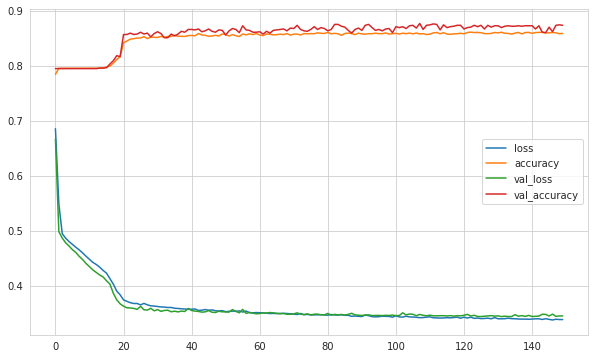

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [61]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.3506023585796356, 0.8537688255310059]

In [140]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3581365942955017
accuracy :  0.8462311625480652


In [141]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1453  130]
 [ 176  231]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1583
           1       0.64      0.57      0.60       407

    accuracy                           0.85      1990
   macro avg       0.77      0.74      0.75      1990
weighted avg       0.84      0.85      0.84      1990



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [134]:
tf.random.set_seed(seed) 

model = Sequential()

model.add(Dense(13, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [135]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [136]:
model.fit(x = X_train_scaled, y = y_train, class_weight={0: 1, 1: 2}, validation_split = 0.15, batch_size = 132, epochs = 250, verbose =1, callbacks = [early_stop])

Epoch 1/250
52/52 [==============================] - 1s 6ms/step - loss: 0.8306 - accuracy: 0.7692 - val_loss: 0.6790 - val_accuracy: 0.7898
Epoch 2/250
52/52 [==============================] - 0s 3ms/step - loss: 0.8042 - accuracy: 0.7952 - val_loss: 0.5457 - val_accuracy: 0.7948
Epoch 3/250
52/52 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.7953 - val_loss: 0.5113 - val_accuracy: 0.7948
Epoch 4/250
52/52 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.7953 - val_loss: 0.5022 - val_accuracy: 0.7948
Epoch 5/250
52/52 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.7955 - val_loss: 0.4904 - val_accuracy: 0.7898
Epoch 6/250
52/52 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.7866 - val_loss: 0.4930 - val_accuracy: 0.7864
Epoch 7/250
52/52 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.7863 - val_loss: 0.5015 - val_accuracy: 0.7797
Epoch 8/250
5

#### Evaluate

In [137]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 13)                182       
                                                                 
 dense_34 (Dense)            (None, 13)                182       
                                                                 
 dense_35 (Dense)            (None, 7)                 98        
                                                                 
 dense_36 (Dense)            (None, 4)                 32        
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [138]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.831,0.769,0.679,0.790
1,0.804,0.795,0.546,0.795
2,0.751,0.795,0.511,0.795
3,0.733,0.795,0.502,0.795
4,0.723,0.795,0.490,0.790


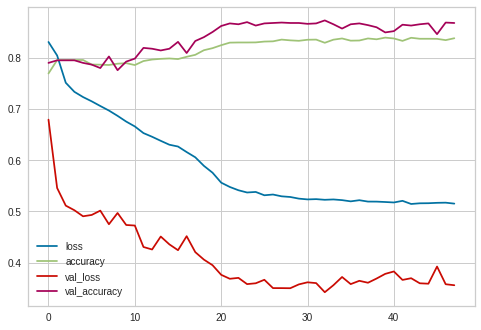

In [139]:
loss_df.plot();

In [70]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.3581365942955017, 0.8462311625480652]

In [71]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3581365942955017
accuracy :  0.8462311625480652


In [72]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1453  130]
 [ 176  231]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1583
           1       0.64      0.57      0.60       407

    accuracy                           0.85      1990
   macro avg       0.77      0.74      0.75      1990
weighted avg       0.84      0.85      0.84      1990



## GridSearchCV

In [73]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [74]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 13, activation = 'relu'))
    classifier.add(Dense(units = 13, activation = 'relu'))
    classifier.add(Dense(units = 7, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [75]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [76]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 250) 

parameters = {'batch_size': [132, 250],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train_scaled, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/250
28/28 [==============================] - 1s 9ms/step - loss: 0.5875 - accuracy: 0.7907 - val_loss: 0.5001 - val_accuracy: 0.7948
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7953 - val_loss: 0.4908 - val_accuracy: 0.7948
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7953 - val_loss: 0.4715 - val_accuracy: 0.7948
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7953 - val_loss: 0.4624 - val_accuracy: 0.7948
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7955 - val_loss: 0.4526 - val_accuracy: 0.7956
Epoch 6/250
28/28 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.7946 - val_loss: 0.4505 - val_accuracy: 0.7881
Epoch 7/250
28/28 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7dc0453bd0>,
             n_jobs=-1,
             param_grid={'batch_size': [132, 250],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [77]:
grid_model.best_score_

0.8574652805195051

In [78]:
grid_model.best_params_

{'batch_size': 250,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [79]:
grid_model.cv_results_

{'mean_fit_time': array([12.20394139, 10.99221311, 12.91550765,  9.66259861, 10.14199233,
         8.89233246,  9.77189631,  8.96666093,  5.82428102,  6.66426888,
        12.32098012,  7.35383453,  3.96398902,  5.26374979, 14.67019234,
         5.12861595,  4.61595364,  7.25068159,  8.81819448,  5.88613229,
         6.69906435,  6.35017123,  6.18664598,  6.82345781]),
 'mean_score_time': array([3.01515145, 1.54357777, 2.20364776, 2.6304215 , 0.37954497,
        0.53699465, 1.68348279, 2.51944604, 1.81690345, 2.18387904,
        5.74450784, 1.8440731 , 1.3500845 , 1.00268378, 3.99904137,
        1.01375794, 1.84314618, 1.92722483, 6.2750051 , 0.55953493,
        2.04314032, 1.11272249, 1.17404542, 1.1425714 ]),
 'mean_test_score': array([0.84313562, 0.84187807, 0.67720753, 0.84175197, 0.85708729,
        0.84904314, 0.79512072, 0.84791209, 0.84036872, 0.85557928,
        0.79700632, 0.84187871, 0.80882279, 0.81460192, 0.78393278,
        0.81561097, 0.83924391, 0.85746528, 0.79072097, 0

In [80]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.843,0.029,10,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
1,0.842,0.012,12,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
2,0.677,0.237,23,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
3,0.842,0.025,13,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
4,0.857,0.010,3,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
5,0.849,0.011,7,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
6,0.795,0.010,20,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
7,0.848,0.012,8,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
8,0.840,0.027,14,"{'batch_size': 132, 'learn_rate': 0.005, 'opti..."
9,0.856,0.007,4,"{'batch_size': 132, 'learn_rate': 0.005, 'opti..."


In [81]:
grid_result.sort_values(by='rank_test_score')

,mean_test_score,std_test_score,rank_test_score,params
17,0.857,0.010,1,"{'batch_size': 250, 'learn_rate': 0.003, 'opti..."
20,0.857,0.008,2,"{'batch_size': 250, 'learn_rate': 0.005, 'opti..."
4,0.857,0.010,3,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
9,0.856,0.007,4,"{'batch_size': 132, 'learn_rate': 0.005, 'opti..."
19,0.855,0.006,5,"{'batch_size': 250, 'learn_rate': 0.003, 'opti..."
21,0.854,0.009,6,"{'batch_size': 250, 'learn_rate': 0.005, 'opti..."
5,0.849,0.011,7,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
7,0.848,0.012,8,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
23,0.847,0.008,9,"{'batch_size': 250, 'learn_rate': 0.005, 'opti..."
0,0.843,0.029,10,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."


#### Evaluate

In [113]:
y_pred = (grid_model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1396  187]
 [ 153  254]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1583
           1       0.58      0.62      0.60       407

    accuracy                           0.83      1990
   macro avg       0.74      0.75      0.75      1990
weighted avg       0.83      0.83      0.83      1990



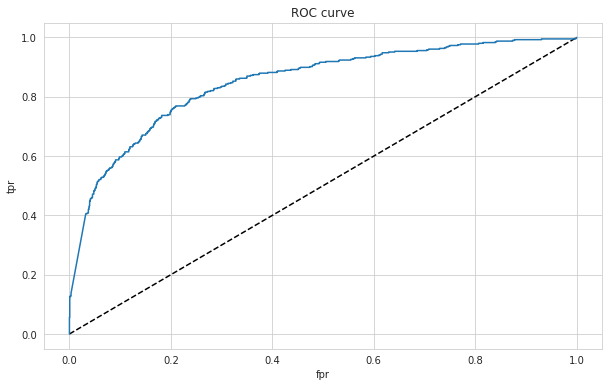

In [82]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [83]:
roc_auc_score(y_test, y_pred_proba)

0.8493204052269118

In [105]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

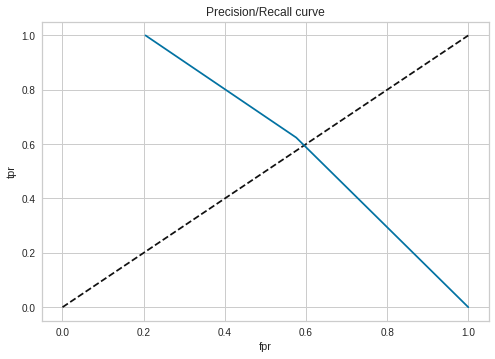

In [114]:
y_pred_proba = model.predict(X_test_scaled)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Precision/Recall curve')
plt.show()


## Final Model and Model Deployment

In [158]:
import pickle
pickle.dump(scaler, open("scaler_ann", 'wb'))

In [180]:
tf.random.set_seed(seed) 

model = Sequential()

model.add(Dense(13, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.0005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])


In [181]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [182]:
model.fit(x = X_train_scaled, y = y_train, validation_data = (X_test_scaled, y_test), class_weight={0: 1, 1: 2}, batch_size = 250, epochs = 250, verbose = 1,
          callbacks = [early_stop])

Epoch 1/250
32/32 [==============================] - 1s 8ms/step - loss: 0.8339 - accuracy: 0.7560 - val_loss: 0.6888 - val_accuracy: 0.7809
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.7896 - val_loss: 0.6840 - val_accuracy: 0.7915
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.7937 - val_loss: 0.6489 - val_accuracy: 0.7940
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7780 - accuracy: 0.7954 - val_loss: 0.5526 - val_accuracy: 0.7955
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.7952 - val_loss: 0.5435 - val_accuracy: 0.7955
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.7952 - val_loss: 0.5277 - val_accuracy: 0.7955
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7403 - accuracy: 0.7952 - val_loss: 0.5225 - val_accuracy: 0.7955
Epoch 8/250
3

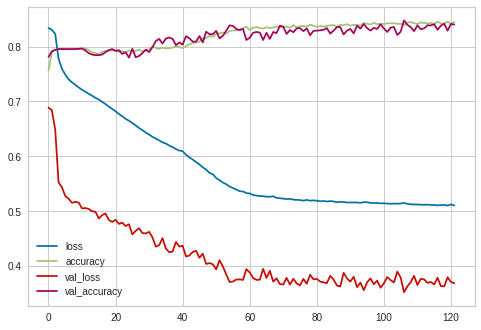

In [183]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [184]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3683830797672272
accuracy :  0.8402010202407837


In [185]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1424  159]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1583
           1       0.61      0.61      0.61       407

    accuracy                           0.84      1990
   macro avg       0.75      0.75      0.75      1990
weighted avg       0.84      0.84      0.84      1990



In [186]:
model.save('model_ann.h5')

In [187]:
from tensorflow.keras.models import load_model

In [192]:
model_ann = load_model('model_ann.h5')
scaler_ann = pickle.load(open("scaler_ann", "rb"))

### Prediction

In [209]:
sample_customer = df.drop('Exited', axis = 1).iloc[0:10, :]
sample_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0
5,645,44,8,113755.780,2,1,0,149756.710,0,0,1,0,1
6,822,50,7,0.000,2,1,1,10062.800,1,0,0,0,1
7,376,29,4,115046.740,4,1,0,119346.880,0,1,0,1,0
8,501,44,4,142051.070,2,0,1,74940.500,1,0,0,0,1
9,684,27,2,134603.880,1,1,1,71725.730,1,0,0,0,1


In [210]:
sample_customer = scaler_ann.transform(sample_customer)
sample_customer

array([[0.538     , 0.42857143, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.516     , 0.41071429, 0.1       , 0.38780208, 0.        ,
        0.        , 1.        , 0.56270874, 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.304     , 0.42857143, 0.8       , 0.73879454, 0.66666667,
        1.        , 0.        , 0.56965435, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.698     , 0.375     , 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.        , 0.44642857, 0.2       , 0.58077317, 0.        ,
        1.        , 1.        , 0.39540036, 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.59      , 0.46428571, 0.8       , 0.52637936, 0.33333333,
        1.        , 0.     

In [211]:
(model_ann.predict(sample_customer) > 0.5).astype("int32")

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [212]:
model_ann.predict(sample_customer)

array([[0.50601345],
       [0.39745897],
       [0.9940525 ],
       [0.1260097 ],
       [0.25903141],
       [0.12453988],
       [0.05597818],
       [0.9971068 ],
       [0.26765752],
       [0.03998509]], dtype=float32)

In [214]:
df["Exited"].iloc[0:10]

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___